In [1]:
import pandas as pd
import yfinance as yf
from objects import VarMask, Portfolio
from utils import *
from graphs import *

In [2]:
time_horizon = 126 #período dos últimos 6 meses

ativos = [
    "PETR4.SA", # Petrobrás
    "VALE3.SA", # Vale
    "ITUB4.SA", # Itaú
    "BBDC4.SA", # Bradesco
    "ABEV3.SA"  # Ambev
] 

#fechamento_carteira é um Dataframe de preços de fechamento de cada ativo em cada dia
fechamento_carteira = yf.download(ativos, period="6mo", interval="1d")['Close']

C:\Users\joaoa\AppData\Local\Temp\ipykernel_12888\2548809900.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fechamento_carteira = yf.download(ativos, period="6mo", interval="1d")['Close']
[*********************100%***********************]  5 of 5 completed


## Gerador de Portifólio

In [3]:
seed = 0
quant = portfolio_generator(seed,ativos)
portfolio = Portfolio(quantities_dict=quant, instruments=dataframe_to_instruments(fechamento_carteira))
print(portfolio)

O Portfolio tem:
----------------------------------------------------------
PETR4.SA: 864 papéis. Com posição R$27708.479736328125
----------------------------------------------------------
VALE3.SA: 394 papéis. Com posição R$21350.85945892334
----------------------------------------------------------
ITUB4.SA: 776 papéis. Com posição R$27392.799407958984
----------------------------------------------------------
BBDC4.SA: 911 papéis. Com posição R$14448.459687232971
----------------------------------------------------------
ABEV3.SA: 430 papéis. Com posição R$5387.899885177612
----------------------------------------------------------


## Série histórica dos Preços

In [4]:
plot_price_series(portfolio,normalize=False)

## Retornos Diários

In [5]:
plot_daily_return(portfolio,normalize=False)

## Volatilidade histórica anualizada (com base em retornos diários)

### Para um único instrumento

In [6]:
vol_inst = vol_instrument(portfolio) # For a single instrument
vol_inst

{'ABEV3.SA': 0.2331141751031049,
 'BBDC4.SA': 0.3205935543387607,
 'ITUB4.SA': 0.20485490738843543,
 'PETR4.SA': 0.25809790314510145,
 'VALE3.SA': 0.25432002467511633}

### Para um Portifólio

In [7]:
vol_port = vol_portfolio(portfolio)
print(f"A volatilidade do Portifólio é: {vol_port['vol anualizado']}")

A volatilidade do Portifólio é: 0.16573217626731818


## Valor em Risco (VaR) da Carteira Paramétrico a 95%

### Definindo a máscara do var


In [8]:
var_mask = VarMask(time_horizon=126,confidence_level=0.95)

In [9]:
var = var_carteira(portfolio,var_mask)
print(f"O VaR a 95% é de R${var}")

O VaR a 95% é de R$18560.663842851744


## Var explodido em cada ativo

{'ABEV3.SA': 9688.539418174649, 'BBDC4.SA': 24233.438685862307, 'ITUB4.SA': 15807.035999692807, 'PETR4.SA': 20891.34081284799, 'VALE3.SA': 17727.73753542248} {'ABEV3.SA': 542.1299678338792, 'BBDC4.SA': 3636.320729575604, 'ITUB4.SA': 4496.8918882110165, 'PETR4.SA': 6011.80104109345, 'VALE3.SA': 3930.9205129893403} {'ABEV3.SA': 0.029118492866171797, 'BBDC4.SA': 0.1953114299257944, 'ITUB4.SA': 0.24153380579570194, 'PETR4.SA': 0.322901510918807, 'VALE3.SA': 0.211134760493525}


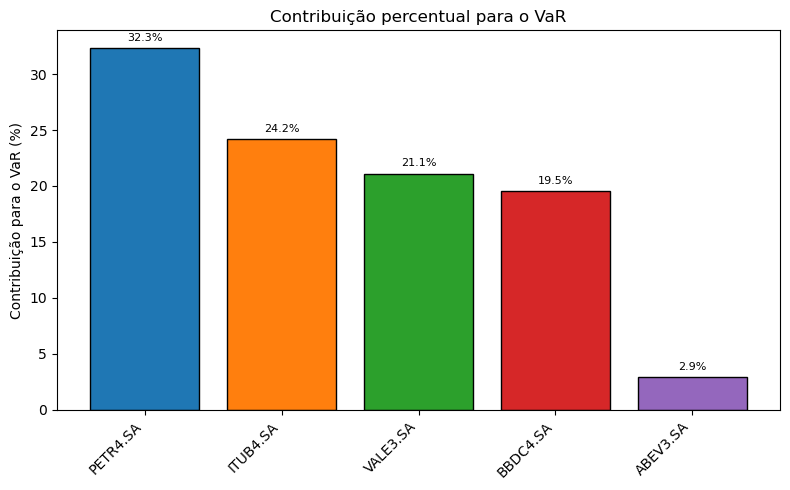

In [10]:
mvar, comp_var, pct = component_var(portfolio, var_mask)
pct_series = pd.Series(pct) 
print(mvar,comp_var,pct)
plot_component_var(pct_series)

## Correlação entre os ativos

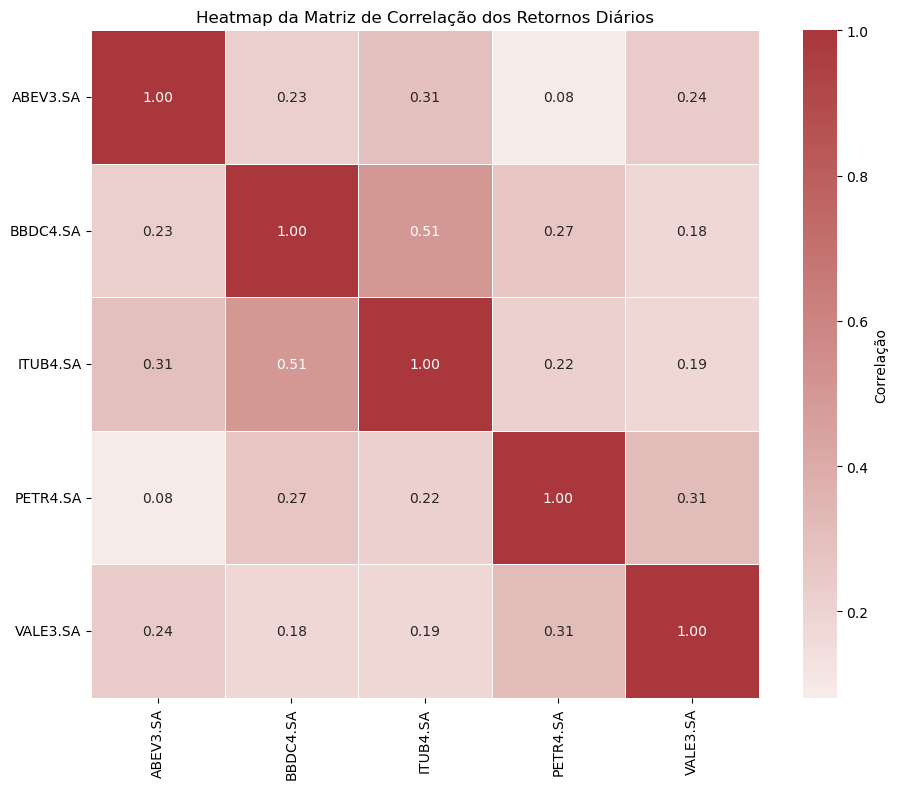

In [11]:
plot_heatmap_corr(portfolio)